In [7]:
!pip install opencv-python-headless


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
!pip install tensorflow matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


Found 992 files belonging to 2 classes.


2024-12-10 13:05:50.740671: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


2024-12-10 13:06:01.683144: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 39298545 exceeds 10% of free system memory.
2024-12-10 13:06:01.950063: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62005248 exceeds 10% of free system memory.
2024-12-10 13:06:02.069828: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 59640000 exceeds 10% of free system memory.
2024-12-10 13:06:02.073138: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84934656 exceeds 10% of free system memory.
2024-12-10 13:06:02.168725: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30108672 exceeds 10% of free system memory.


43/43 ━━━━━━━━━━━━━━━━━━━━ 36s 637ms/step - accuracy: 0.6818 - loss: 0.6092 - val_accuracy: 0.8092 - val_loss: 0.5421
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 552ms/step - accuracy: 0.8116 - loss: 0.4902 - val_accuracy: 0.8980 - val_loss: 0.4573
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 539ms/step - accuracy: 0.8887 - loss: 0.4102 - val_accuracy: 0.9112 - val_loss: 0.3947
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 544ms/step - accuracy: 0.9127 - loss: 0.3450 - val_accuracy: 0.9046 - val_loss: 0.3665
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 536ms/step - accuracy: 0.9187 - loss: 0.3224 - val_accuracy: 0.9211 - val_loss: 0.3273
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 532ms/step - accuracy: 0.9395 - loss: 0.2806 - val_accuracy: 0.9079 - val_loss: 0.3052
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 25s 587ms/step - accuracy: 0.9314 - loss: 0.2612 - val_accuracy: 0.9375 - val_loss: 0.2736
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 546ms/step - accuracy: 0.9431 - loss: 0.2508 - val_accuracy: 0.944

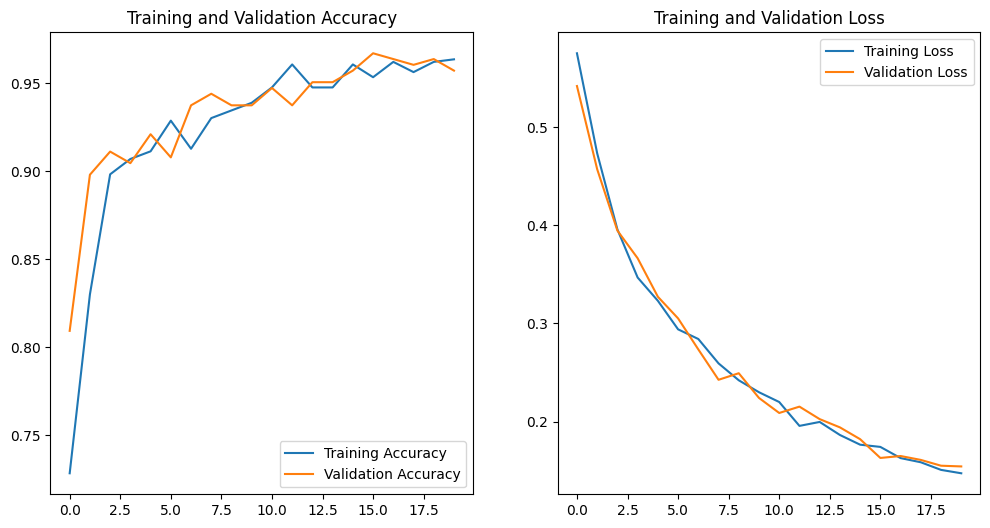

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

# 데이터셋 경로
data_dir = "./datasets/fire_dataset"

# 데이터셋 로드
batch_size = 16
img_size = (224, 224)

data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True
)

# 데이터셋 분할
train_size = int(0.7 * len(data))
train = data.take(train_size)
val = data.skip(train_size)

# 데이터 증강
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

# 데이터셋에 증강 적용
train = train.map(lambda x, y: (data_augmentation(x, training=True), y))

# 사전 학습된 EfficientNetB0 모델 불러오기
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 사전 학습된 가중치 고정

# 모델 정의
model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# 훈련
epochs = 20
history = model.fit(train, validation_data=val, epochs=epochs)

# 결과 시각화
def plot_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_results(history)
